<a href="https://colab.research.google.com/github/oluwafemiomitusa/Urbanization-and-Climate-Change/blob/main/nexrad_level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

pip install pyproj


In [10]:
pip install arm-pyart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 53.3 MB/s eta 0:00:00


In [79]:
pip install wradlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.2/272.2 kB 7.6 MB/s eta 0:00:00


In [11]:
print(__doc__)

# Author: Max Grover (mgrover@anl.gov)
# License: BSD 3 clause

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import pyart

Automatically created module for IPython interactive environment

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [12]:
aws_nexrad_level3_velocity_file = (
    "s3://unidata-nexrad-level3/HGX_N0U_2022_03_22_12_01_25"
)
aws_nexrad_level3_reflectivity_file = (
    "s3://unidata-nexrad-level3/HGX_N1P_2022_03_22_12_01_25"
)

In [13]:
radar_level3_velocity = pyart.io.read_nexrad_level3(aws_nexrad_level3_velocity_file)
radar_level3_reflectivity = pyart.io.read_nexrad_level3(
    aws_nexrad_level3_reflectivity_file
)

In [14]:
print(
    "velocity radar object: ",
    list(radar_level3_velocity.fields),
    "reflectivity radar object: ",
    list(radar_level3_reflectivity.fields),
)

velocity radar object:  ['velocity'] reflectivity radar object:  ['radar_estimated_rain_rate']


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


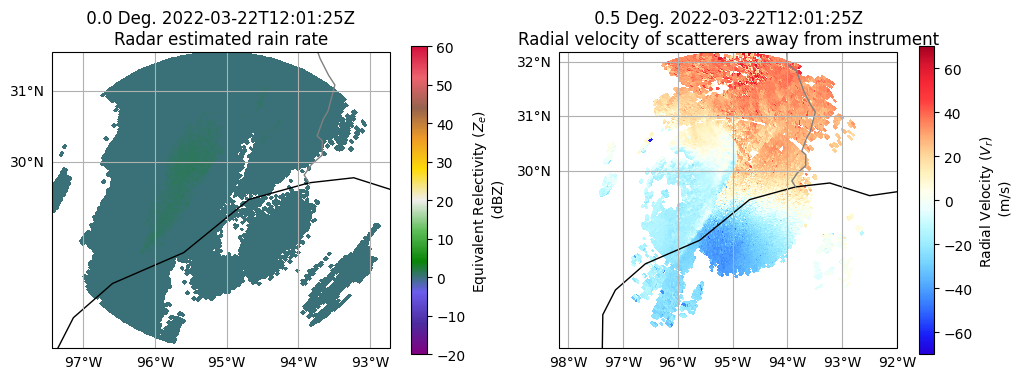

In [15]:
fig = plt.figure(figsize=(12, 4))
reflectivity_display = pyart.graph.RadarMapDisplay(radar_level3_reflectivity)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

reflectivity_display.plot_ppi_map(
    "radar_estimated_rain_rate",
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

velocity_display = pyart.graph.RadarMapDisplay(radar_level3_velocity)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

velocity_display.plot_ppi_map(
    "velocity",
    ax=ax,
    colorbar_label="Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-70,
    vmax=70,
)

In [16]:
radar_level3_reflectivity.fields

{'radar_estimated_rain_rate': {'units': 'inches/hour',
  'standard_name': 'radar_estimated_rain_rate',
  'long_name': 'Radar estimated rain rate',
  'coordinates': 'elevation azimuth range',
  '_FillValue': -9999.0,
  'data': masked_array(
    data=[[--, 0.0, --, ..., 0.0, 0.0, 0.0],
          [--, 0.0, --, ..., 0.0, 0.0, 0.0],
          [--, --, 0.0, ..., 0.0, 0.0, 0.0],
          ...,
          [--, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
          [--, --, 0.0, ..., 0.0, 0.0, 0.0],
          [--, 0.0, --, ..., 0.0, 0.0, 0.0]],
    mask=[[ True, False,  True, ..., False, False, False],
          [ True, False,  True, ..., False, False, False],
          [ True,  True, False, ..., False, False, False],
          ...,
          [ True, False, False, ..., False, False, False],
          [ True,  True, False, ..., False, False, False],
          [ True, False,  True, ..., False, False, False]],
    fill_value=-999.0,
    dtype=float32)}}

In [17]:
# Define the variable
aws_nexrad_level3_precip_file = (
    "s3://unidata-nexrad-level3/HGX_N1P_2022_03_22_12_01_25"
)
# Read the data using PyART
radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)
# Obtain precip data
radar_level3_precip.fields['radar_estimated_rain_rate']['data']
# Obtain lons and lats
#radar_level3_precip.longitude['data']
#radar_level3_precip.latitude['data']

masked_array(
  data=[[--, 0.0, --, ..., 0.0, 0.0, 0.0],
        [--, 0.0, --, ..., 0.0, 0.0, 0.0],
        [--, --, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [--, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [--, --, 0.0, ..., 0.0, 0.0, 0.0],
        [--, 0.0, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True, False,  True, ..., False, False, False],
        [ True, False,  True, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        ...,
        [ True, False, False, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        [ True, False,  True, ..., False, False, False]],
  fill_value=-999.0,
  dtype=float32)

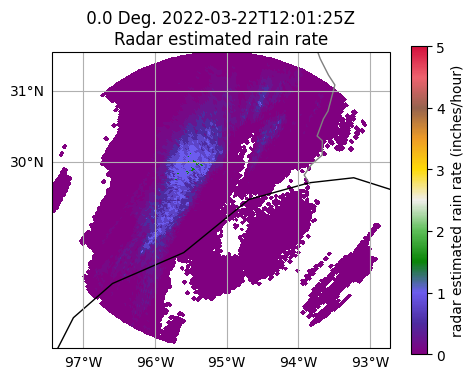

In [18]:

# Visualize the precip
fig = plt.figure(figsize=(12, 4))
precip_display = pyart.graph.RadarMapDisplay(radar_level3_precip)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

precip_display.plot_ppi_map(
    "radar_estimated_rain_rate",
    ax=ax,
    vmin=0,
    vmax=5,
)

In [160]:
import numpy as np
import wradlib as wrl

# Define the variable
aws_nexrad_level3_precip_file = "s3://unidata-nexrad-level3/HGX_N1P_2022_03_22_12_01_25"

# Read the data using PyART
radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)

# Get radar gate (data point) information
azimuths = radar_level3_precip.azimuth['data']
ranges = radar_level3_precip.range['data']
elevation = radar_level3_precip.elevation['data'][0]  # assuming all elevations are the same

# Get radar location
radar_lon = radar_level3_precip.longitude['data'][0]
radar_lat = radar_level3_precip.latitude['data'][0]

# Define the WGS84 ellipsoid
wgs84 = pyproj.Proj(proj='latlong', datum='WGS84')

# Convert (azimuth, range, elevation) to (x, y, z) in the WGS84 projection

coords = wrl.georef.polar.spherical_to_proj(ranges, azimuths, elevation, (radar_lon, radar_lat))

lon = coords[..., 0]
lat = coords[..., 1]

# Obtain precipitation data
precip_data = radar_level3_precip.fields['radar_estimated_rain_rate']['data']

# Apply the mask to the precipitation data
masked_precip_data = ma.masked_array(precip_data, mask=radar_level3_precip.fields['radar_estimated_rain_rate']['data'].mask)

# Get the precipitation values without the masked values
precip_values = masked_precip_data.compressed()

# Now, precip_values, lon, lat, x, y all have the same shape (without the masked values)
# Apply the mask to lon and lat arrays
lon_masked = ma.masked_array(lon, mask=masked_precip_data.mask)
lat_masked = ma.masked_array(lat, mask=masked_precip_data.mask)

# Get the lon and lat values without the masked values
lon_values = lon_masked.compressed()
lat_values = lat_masked.compressed()


In [162]:
lon_values.shape

(25399,)

In [169]:
min(lon_values)

-97.42927334579979

In [164]:
lat_values.shape

(25399,)

In [165]:
precip_values.shape

(25399,)

In [170]:
import pandas as pd

# Create a DataFrame with lon, lat, and precip values
data = {'Longitude': lon_values, 'Latitude': lat_values, 'Precipitation': precip_values}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


       Longitude   Latitude  Precipitation
0     -95.079360  29.490041            0.0
1     -95.080440  29.544162            0.0
2     -95.081162  29.580243            0.0
3     -95.081883  29.616324            0.0
4     -95.082244  29.634364            0.0
...          ...        ...            ...
25394 -95.119379  31.455727            0.0
25395 -95.119753  31.473750            0.0
25396 -95.120128  31.491773            0.0
25397 -95.120503  31.509795            0.0
25398 -95.120878  31.527817            0.0

[25399 rows x 3 columns]
